# Introduction to `geopandas`
---
### <font color='red'> Tutorial start: 8:00
Today we are going to learn how to use python and Jupyter notebooks to learn the basics of working with geospatial data in `geopandas`. `geopandas` is built on top of the `pandas` package you saw in the previous lab. Many of the methods you will see in this lab are shared between the two packages.

In [2]:
# This line tells iPython to not display warnings.
import warnings
warnings.filterwarnings('ignore')

# RUN THIS CELL FIRST or the notebook won't work
import numpy as np
import pandas as pd
import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt

# These help the maps display nicely in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]

First, let's load our data and see what kind of data we are working with.  The `read_file` method requires that we pass the _filepath_ from our current directory (the location of this notebook) to the data. The `pwd()` function shows you the your current location in the file system. Another way you can say this is that it __p__rints your __w__orking __d__irectory.

In [3]:
pwd()

'/home/jovyan/CP-101-student/Lab9'

To get to the data, we would first enter the `shapefiles` folder from the working directory, then the `alameda` folder. The way we communicate this to the function is by passing `'shapefiles/alameda/'` as an argument. This folder contains demographic information organized by census tract in Alameda County.

In [4]:
alameda = gpd.read_file('shapefiles/alameda/')

Let's take a look at what our data looks like in Jupyter. We can use the `.head()` method to show the first 5 rows of our data. Similarly, you can use the `.tail()` method to show the last 5 rows of the data.

In [5]:
alameda.head()

,AFFGEOID,ALAND,ALAND_1,AWATER,AWATER_1,COUNTYFP,COUNTYFP_1,FID_1,FUNCSTAT,GEOID,...,female,male,medianage,mergeid,pct_20to64,pct_over64,pct_pov,pct_und_20,total_pop,geometry
0,1400000US06001400600,297856.0,297856.0,0.0,0.0,001,001,275.0,S,06001400600,...,1020.0,730.0,34.4,06001400600,78.2,9.8,8.3,12.0,1750.0,"POLYGON ((-122.26807 37.84414, -122.26514 37.8..."
1,1400000US06001400900,420877.0,420877.0,0.0,0.0,001,001,297.0,S,06001400900,...,1106.0,925.0,38.9,06001400900,71.0,7.7,12.0,21.0,2031.0,"POLYGON ((-122.28558 37.83978, -122.28319 37.8..."
2,1400000US06001401400,758241.0,758241.0,0.0,0.0,001,001,239.0,S,06001401400,...,2170.0,2127.0,31.3,06001401400,64.7,8.2,41.7,27.1,4297.0,"POLYGON ((-122.27861 37.82688, -122.26856 37.8..."
3,1400000US06001403000,352394.0,352394.0,0.0,0.0,001,001,258.0,S,06001403000,...,1445.0,1026.0,58.3,06001403000,47.9,43.8,30.2,8.3,2471.0,"POLYGON ((-122.27476 37.79883, -122.27127 37.8..."
4,1400000US06001405902,487280.0,487280.0,0.0,0.0,001,001,746.0,S,06001405902,...,1713.0,1808.0,31.5,06001405902,58.6,10.0,31.0,31.5,3521.0,"POLYGON ((-122.24717 37.78991, -122.24351 37.7..."


The first few columns of the table contain information relating to the itentity of each census tract, but we can't interpret these without looking at the metadata for this dataset. If you scroll the table all the way to the right, you can see some columns with names that are more easily interpretable. However, because the table we are reading in has more columns than the page can accomodate, the display omits the middle columns to make the table narrower. To see a list of all of the columns in our `GeoDataFrame`, we access use the `.column` attribute like so.

In [6]:
alameda.columns

Index(['AFFGEOID', 'ALAND', 'ALAND_1', 'AWATER', 'AWATER_1', 'COUNTYFP',
       'COUNTYFP_1', 'FID_1', 'FUNCSTAT', 'GEOID', 'GEOID_1', 'Geography',
       'INTPTLAT', 'INTPTLON', 'Id', 'Id2', 'LSAD', 'MTFCC', 'NAME',
       'NAMELSAD', 'NAME_1', 'STATEFP', 'STATEFP_1', 'TRACTCE', 'TRACTCE_1',
       'female', 'male', 'medianage', 'mergeid', 'pct_20to64', 'pct_over64',
       'pct_pov', 'pct_und_20', 'total_pop', 'geometry'],
      dtype='object')

## Examining the data 

### Accessing the data <font color='red'> (21:10)

The `.loc[]` and `.iloc[]` methods allow us to view cells in a `DataFrame` or `GeoDataFrame` based on their name or location. The __i__ in `.iloc[]` stands for the __integer__ position of a cell, and accesses cells by location in index coordinates. The `.loc[]` method allows you to access cells by the index of the rows and the names of the columns. For both `.loc[]` and `.iloc[]`, the first argument refers to the row, and the second argument refers to the column.

Typically the row index will be the same as its integer position, but that is not always the case. Let's set up a `DataFrame` to see this in action.

In [7]:
df = pd.DataFrame(data = {'a': [1, 2, 3],
                         'b': [4, 5, 6],
                         'c': [7, 8, 9],
                         'd': [10, 11, 12]},
                 index = [1.1, 1.2, 1.3])
df

,a,b,c,d
1.1,1,4,7,10
1.2,2,5,8,11
1.3,3,6,9,12


If we want to access the number 8 from `df`, we would need to tell `.iloc[]` to look in `df` at row `1`, column `2` (remember that python starts counting from zero!).

In [8]:
df.iloc[1, 2]

8

Using `.loc[]`, we would need to tell the method that we want row index `1.2`, column name `'c'`.

In [9]:
df.loc[1.2, 'c']

8

You can also specify a range of indices to both of these methods if you want to access multiple adjacent cells. For `iloc[]`, this range will always refer to integer coordinates of the cells.

In [10]:
# This code tells .iloc that we want rows 0 and 2, then all columns with index
# greater than or equal to 1.
df.iloc[[0, 2], 1:]

,b,c,d
1.1,4,7,10
1.3,6,9,12


We can also refer to a range named columns and rows using `.loc[]`

In [11]:
# This code tells .loc that we want row 1.2, columns 'b' through 'd' inclusive.
df.loc[[1.2], 'b':'d']

,b,c,d
1.2,5,8,11


### Basic maps <font color='red'> (26:10)

The `geometry` column contains a new data type called a polygon, which is how `geopandas` is able to store geographic information. Let's look at one of these polygons using `.loc[]`.

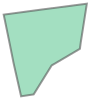

In [12]:
alameda.loc[0, 'geometry']

To view all of the polygons in the `GeoDataFrame`, we can just use the `.plot()` method. The documentation for this function can be found [here](http://geopandas.org/mapping.html).

<AxesSubplot:>

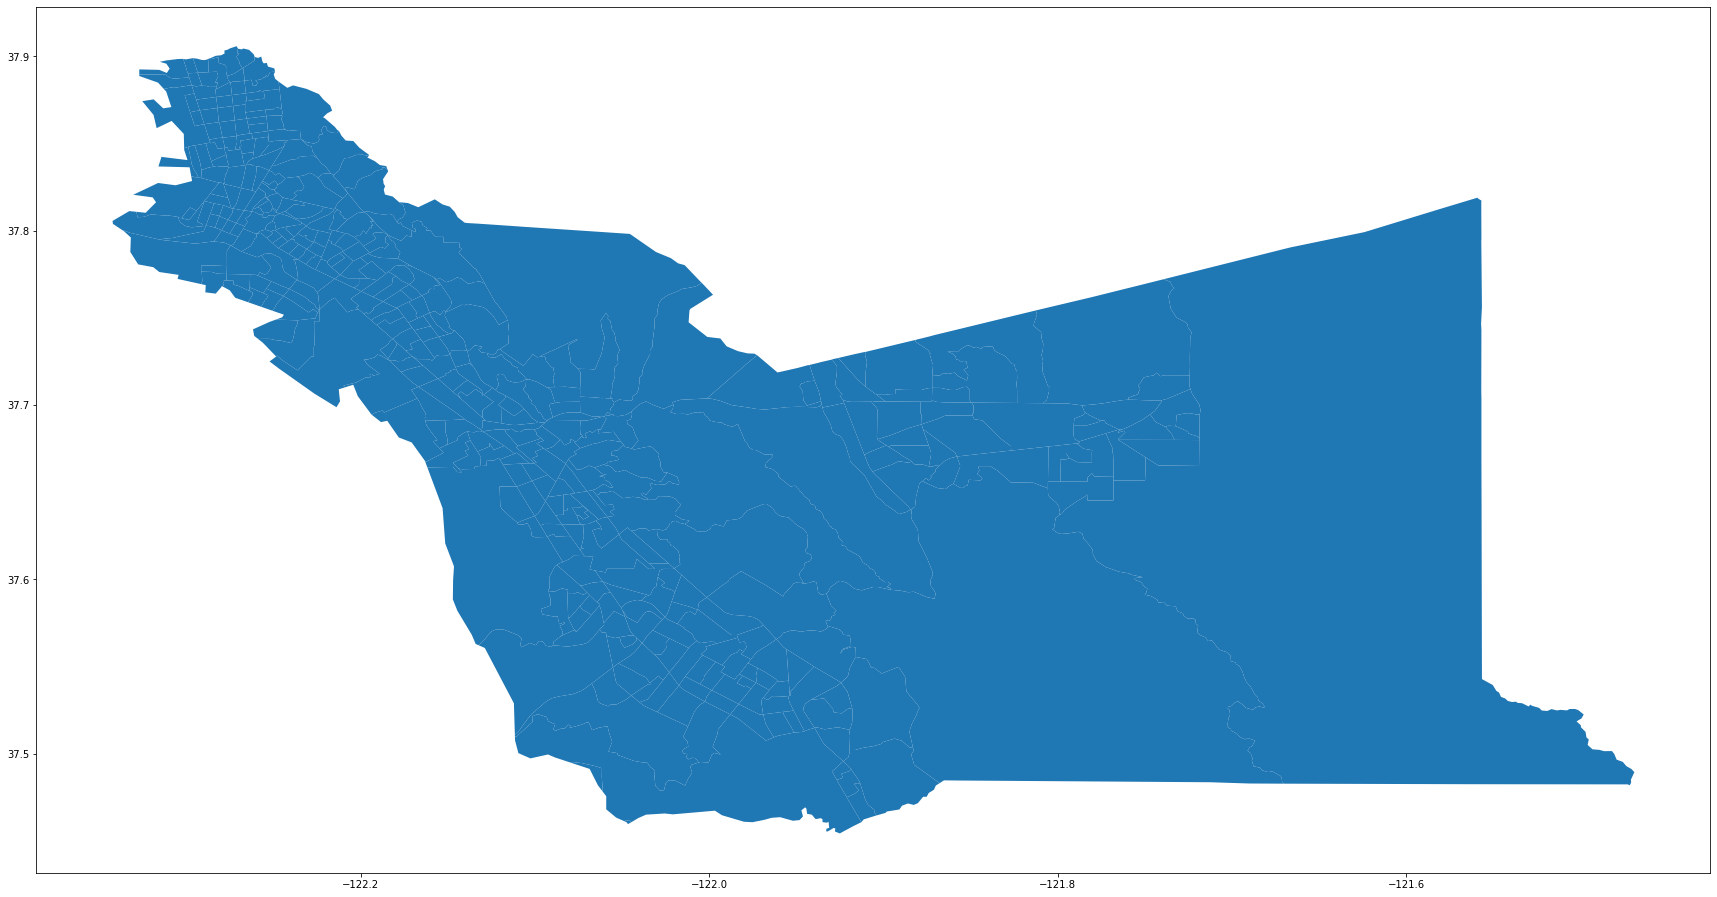

In [13]:
alameda.plot()

You can improve the appearance of this graph by removing the axis labels surrounding the map and adding a title. You may also see a line that says something like `<matplotlib.axes._subplots.AxesSubplot at 0x1120b5710>` above the map. You can prevent Jupyter from displaying this line by adding a `;` to the last line of code creating the map.

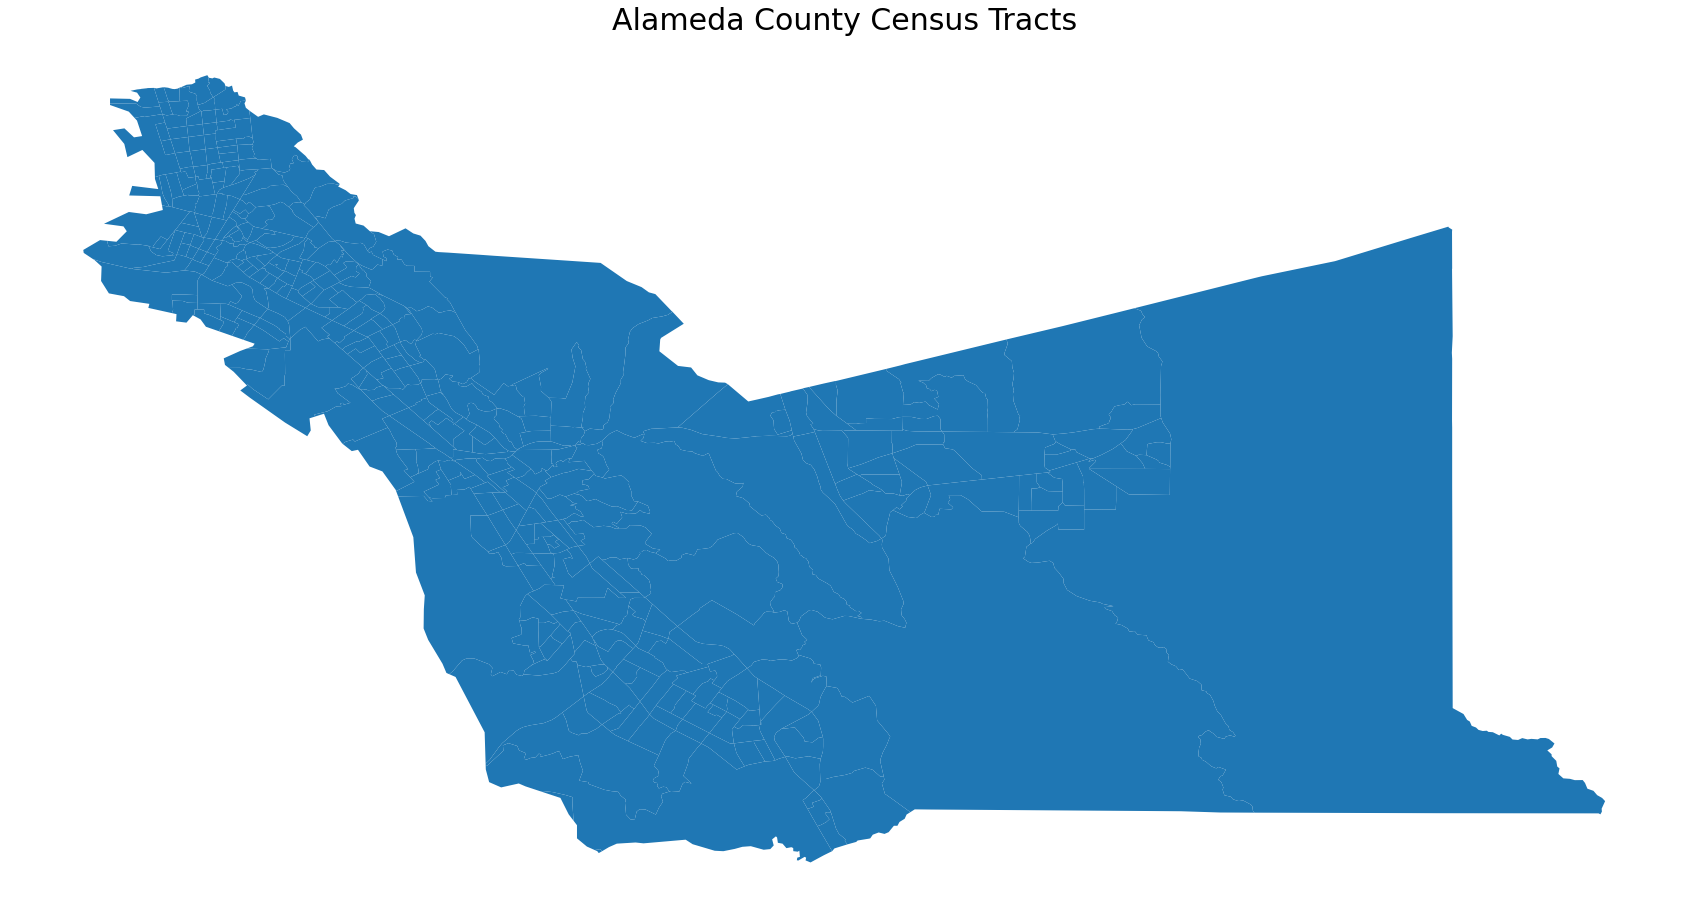

In [14]:
alameda.plot()

# Adding the fontsize argument allows you to manipulate the font size.
plt.title('Alameda County Census Tracts', fontsize = 30)

# This turns the plot axes off.
plt.axis('off');

### <font color='red'> [PAUSE VIDEO HERE] (new for 2021)

Does the map look a little... squished to you? We can fix this by setting the Coordinate Reference System (CRS). You can read more here: https://geopandas.org/docs/user_guide/projections.html Run the next two cells to see how the map changes.

In [15]:
alameda.crs ={'init': 'epsg:4326'}

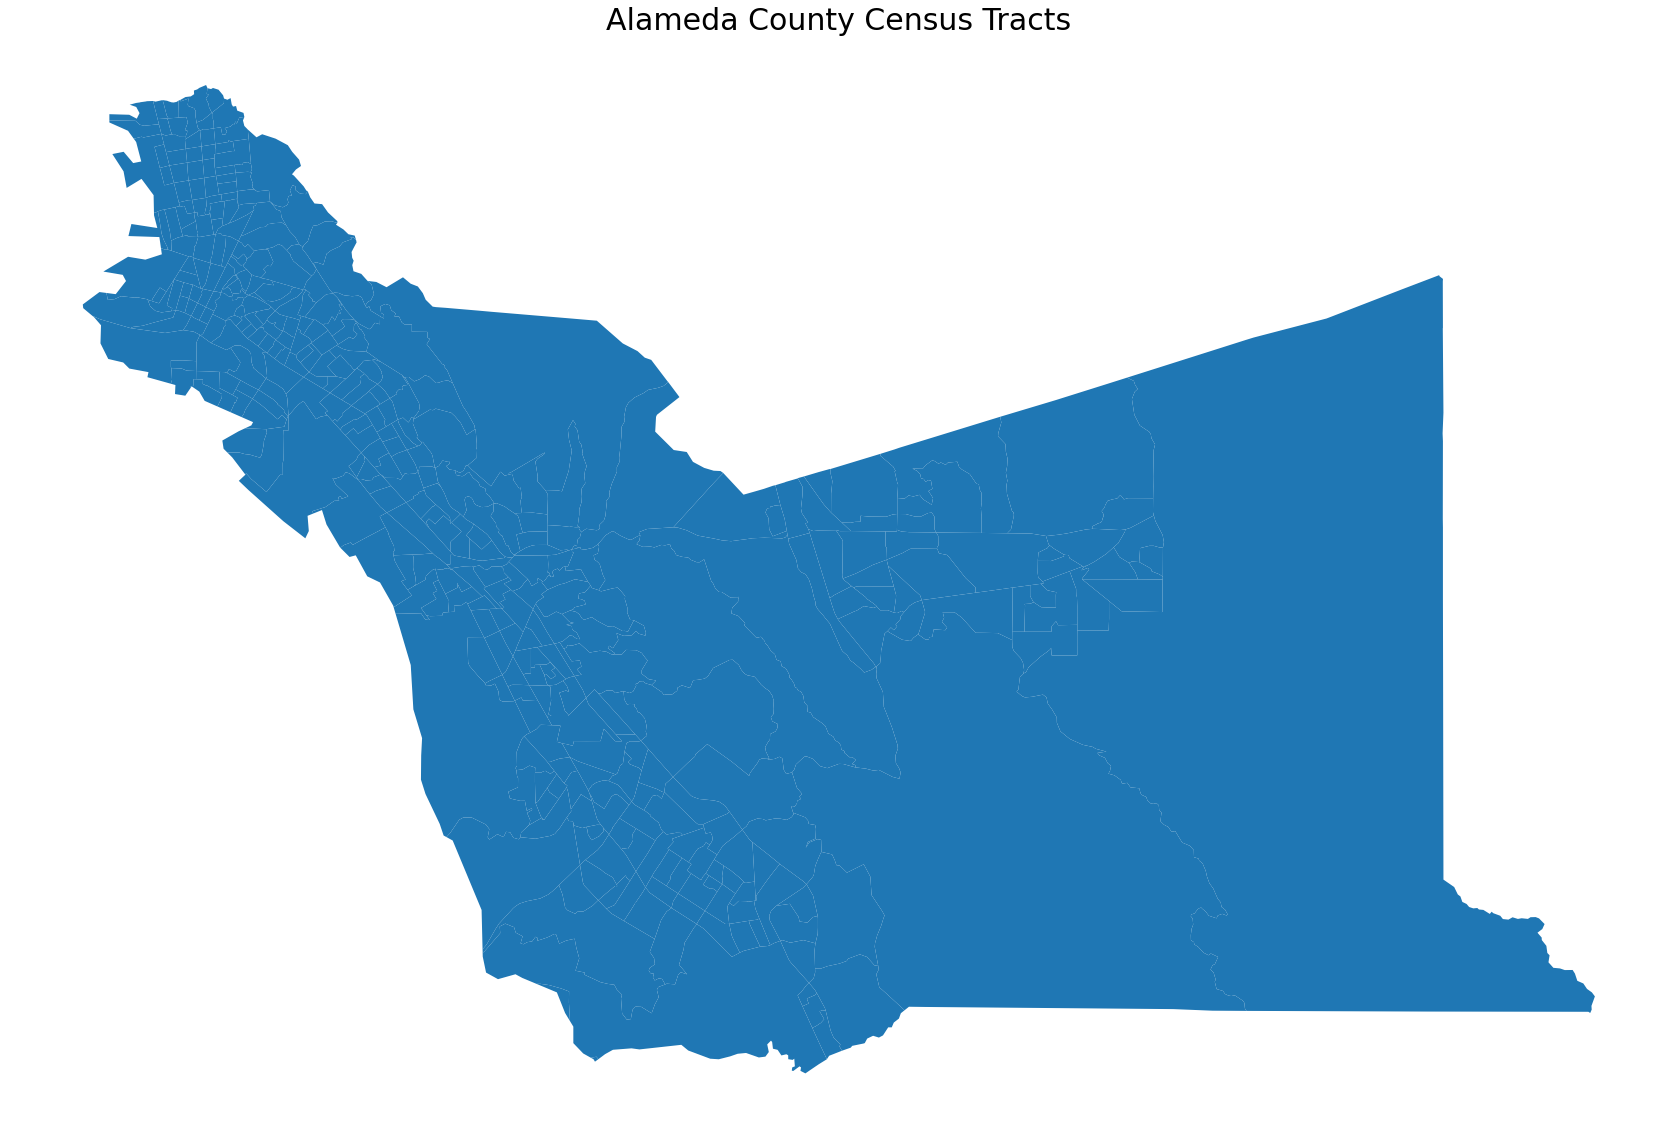

In [16]:
alameda.plot()
plt.title('Alameda County Census Tracts', fontsize = 30)
plt.axis('off');

### Choropleth maps <font color='red'> (29:50)

If we want to make this map more informative, we can incorporate some of the other columns from the data into the map. For example, the `'pct_pov'` column in the table contains the percentage of people living in poverty in each census tract.

In [17]:
alameda['pct_pov']

0       8.3
1      12.0
2      41.7
3      30.2
4      31.0
       ... 
356     4.2
357    17.3
358     8.1
359     5.0
360     2.6
Name: pct_pov, Length: 361, dtype: float64

We can pass the column name as an optional argument to the `.plot()` method to create a map with a color gradient based on the values in this column. Setting `legend` equal to `True` in the function call will also tell the method that we want our final plot to have a legend so that we can interpret the colors on the map. 

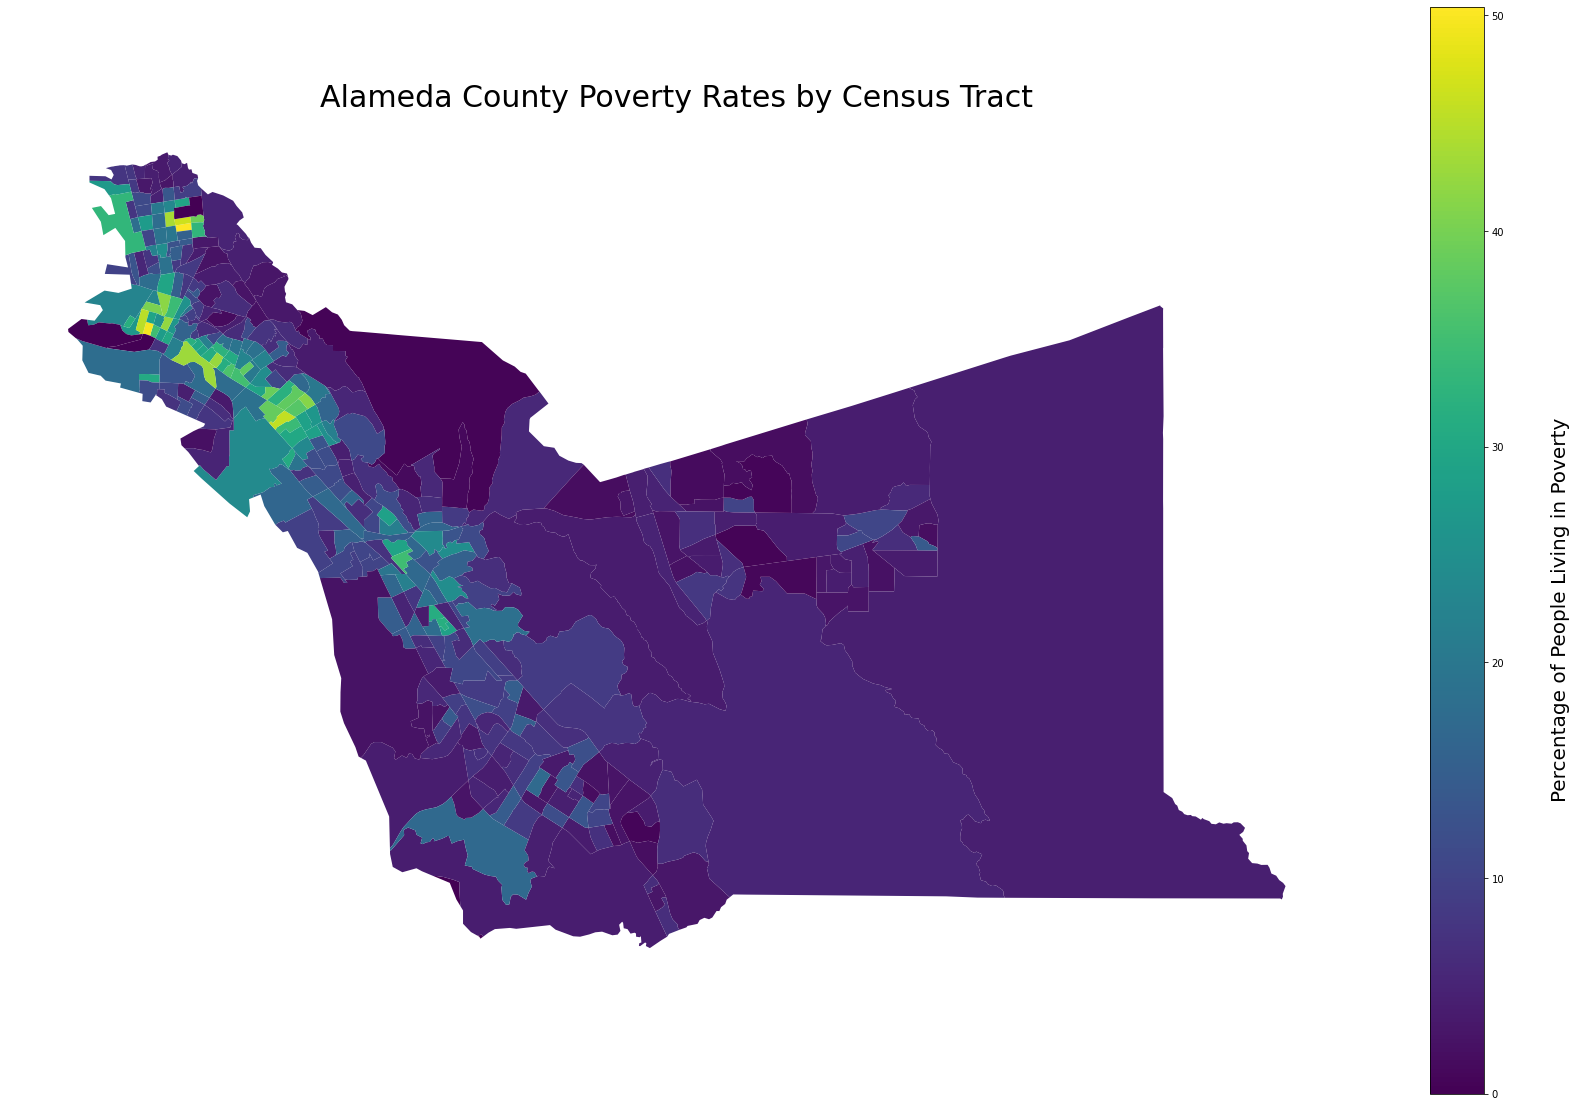

In [18]:
alameda.plot(column = 'pct_pov', legend = True)
#Bounds supplies information on the maximum and minimum values of the x-axis and y-axis of our plot.
bounds = alameda.bounds.iloc[0]
''' 
        minx   -122.268070
        miny     37.837482
        maxx   -122.261296
        maxy     37.845027
        Name: 0, dtype: float64 
'''
minx = bounds["minx"]
miny = bounds["miny"]
# We use that information to place the text label for our legend
plt.text(minx + 1, miny - 0.3, 'Percentage of People Living in Poverty', fontsize=20, rotation=90, rotation_mode='anchor')
plt.title('Alameda County Poverty Rates by Census Tract', fontsize = 30)
plt.axis('off');

If you want to change the color scheme of the map, you can choose the "color map" of the plot by adding in the optional `cmap` argument to `plot()`. You can choose from the variety of color maps available in the `matplotlib` package, which is what our plotting software is built off of. Above, we saw the default colormap, which is called viridis. If you want to view all the available colormaps, you can reference the documentation [here](https://matplotlib.org/users/colormaps.html).

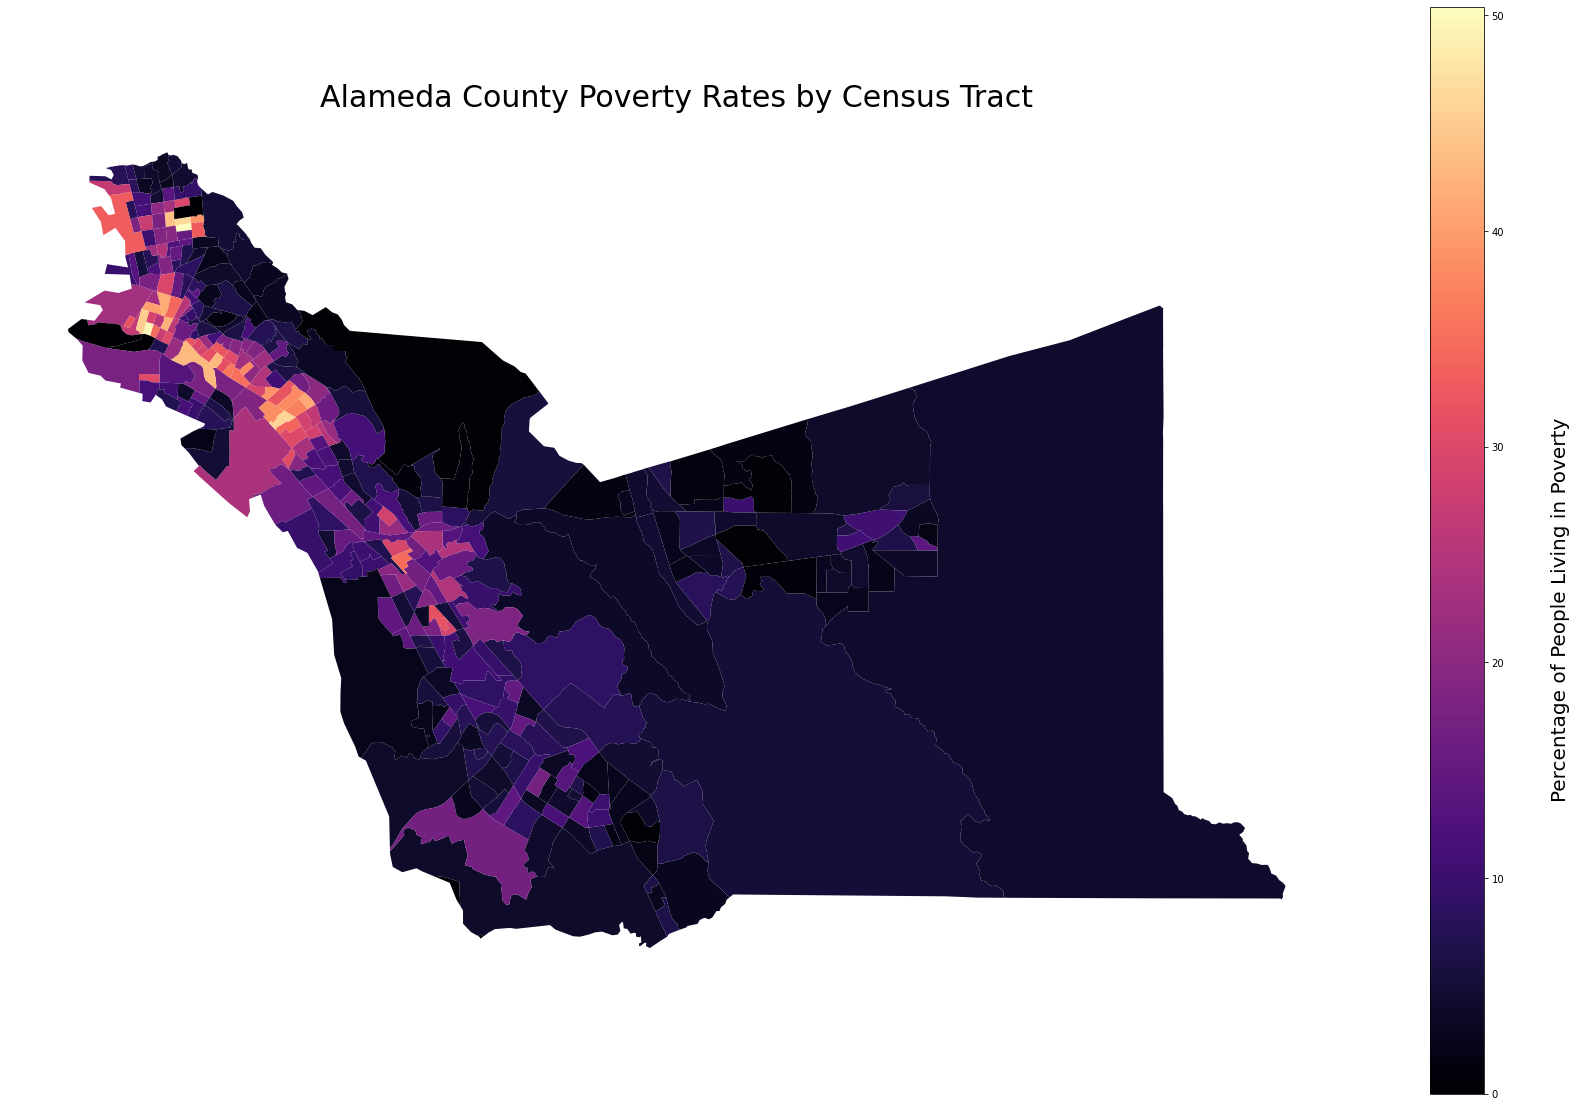

In [19]:
alameda.plot(column = 'pct_pov', legend = True, cmap = 'magma')
bounds = alameda.bounds.iloc[0]
minx = bounds["minx"]
miny = bounds["miny"]
plt.text(minx + 1, miny - 0.3, 'Percentage of People Living in Poverty', fontsize=20, rotation=90, rotation_mode='anchor')
plt.title('Alameda County Poverty Rates by Census Tract', fontsize = 30)
plt.axis('off');

Now it's your turn! In the following cell, try creating your own choropleth map using a different column from `alameda`. If you want to see all of the columns in our data, you can scroll up to where we displayed all of the column names.

<font color = 'red'> (skip to 1:14:10 to see solution)

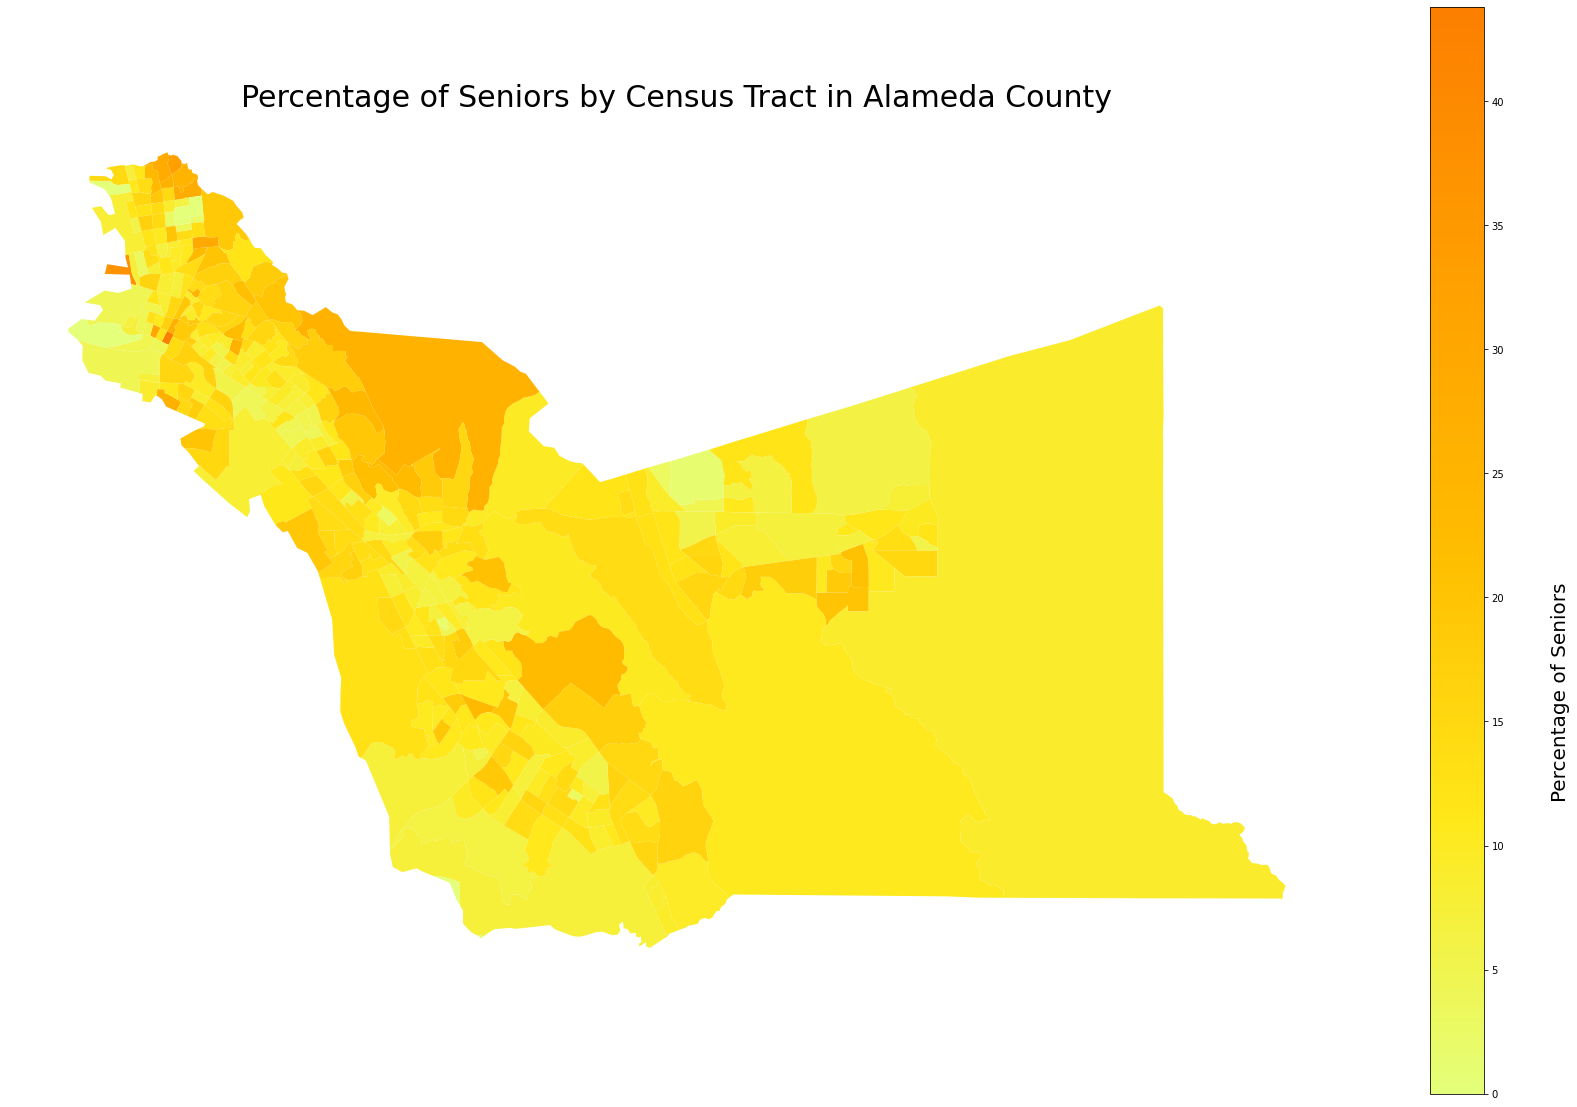

In [46]:
# YOUR CODE HERE
alameda.plot(column = 'pct_over64', legend = True, cmap = 'Wistia')
bounds = alameda.bounds.iloc[0]
minx = bounds["minx"]
miny = bounds["miny"]
plt.text(minx + 1, miny - 0.3, 'Percentage of Seniors', fontsize=20, rotation=90, rotation_mode='anchor')
plt.title('Percentage of Seniors by Census Tract in Alameda County', fontsize = 30)
plt.axis('off');

What are some conclusions that you can draw from the map you created?

YOUR ANSWER HERE

### Creating a new shapefile <font color='red'> (39:50)

Let's isolate the census tracts belonging to Berkeley. Below are the identification numbers for Berkeley's census tracts.

In [20]:
berkeley_census_tracts = [4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225,
                          4226, 4227, 4228, 4229, 4230, 4231, 4232, 4233, 4234, 4235, 4236, 4236.01, 4236.02,
                          4237, 4238, 4239.01, 4239.02, 4240.01, 4240.02]

The data in our `GeoDataFrame` are all strings, so we need to convert these numbers into strings before python can compare them to our data. We are going to use a technique called a list comprehension to do this. A list comprehension is basically a for loop condensed into a single line.

In [21]:
berkeley_census_tracts = [str(id) for id in berkeley_census_tracts]

If we were going to write this list comprehension as a for loop, we would have to create a new list to save our converted data into. It would look a little something like this:
```
berkeley_census_tracts_str = []
for id in berkley_census_tracts:
    berkeley_census_tracts_str.append(str(id))
```
List comprehensions are so much more efficient!

Next, we are going to use a for loop to look at all of the rows in `alameda` and add the rows belonging to Berkeley census tracts to a new `GeoDataFrame`.

In [22]:
# Create a new GeoDataFrame
berkeley = gpd.GeoDataFrame()
for row in range(len(alameda)):
    # If the NAME of a census tract is in our list of Berkeley census tracts, we want to
    # add it to our berkeley GeoDataFrame.
    if alameda.loc[row, 'NAME'] in berkeley_census_tracts:
        berkeley = berkeley.append(alameda.loc[row, :])
berkeley.head()

,AFFGEOID,ALAND,ALAND_1,AWATER,AWATER_1,COUNTYFP,COUNTYFP_1,FID_1,FUNCSTAT,GEOID,...,female,geometry,male,medianage,mergeid,pct_20to64,pct_over64,pct_pov,pct_und_20,total_pop
7,1400000US06001421400,474780.0,474780.0,0.0,0.0,001,001,686.0,S,06001421400,...,974.0,"POLYGON ((-122.27603 37.88887, -122.27251 37.8...",747.0,51.3,06001421400,53.7,26.3,2.8,20.2,1721.0
8,1400000US06001422900,544282.0,544282.0,0.0,0.0,001,001,157.0,S,06001422900,...,2260.0,"POLYGON ((-122.27307 37.87151, -122.26840 37.8...",2177.0,23.1,06001422900,72.5,2.5,43.9,25.1,4437.0
9,1400000US06001424001,507529.0,507529.0,0.0,0.0,001,001,131.0,S,06001424001,...,2045.0,"POLYGON ((-122.27912 37.85329, -122.27116 37.8...",1954.0,30.4,06001424001,72.2,6.8,24.7,21.1,3999.0
36,1400000US06001421500,1590680.0,1590680.0,3635.0,3635.0,001,001,314.0,S,06001421500,...,1984.0,"POLYGON ((-122.26774 37.89313, -122.26268 37.8...",1809.0,49.9,06001421500,56.0,24.9,4.5,19.2,3793.0
37,1400000US06001422100,551943.0,551943.0,0.0,0.0,001,001,488.0,S,06001422100,...,1183.0,"POLYGON ((-122.30085 37.87757, -122.29535 37.8...",1101.0,39.7,06001422100,71.7,11.9,7.7,16.7,2284.0


Next, we can save our new `GeoDataFrame`. The following code saves `berkeley` as a file type called a "shapefile," which happens to be the same file type as the data we read in earlier. `geopandas` can also read and write many other geospatial file types, but we are just going to be using the same file type as before for now.

In [23]:
berkeley.to_file(driver='ESRI Shapefile', filename = 'shapefiles/berkeley')

Now we can make a map with our new data.

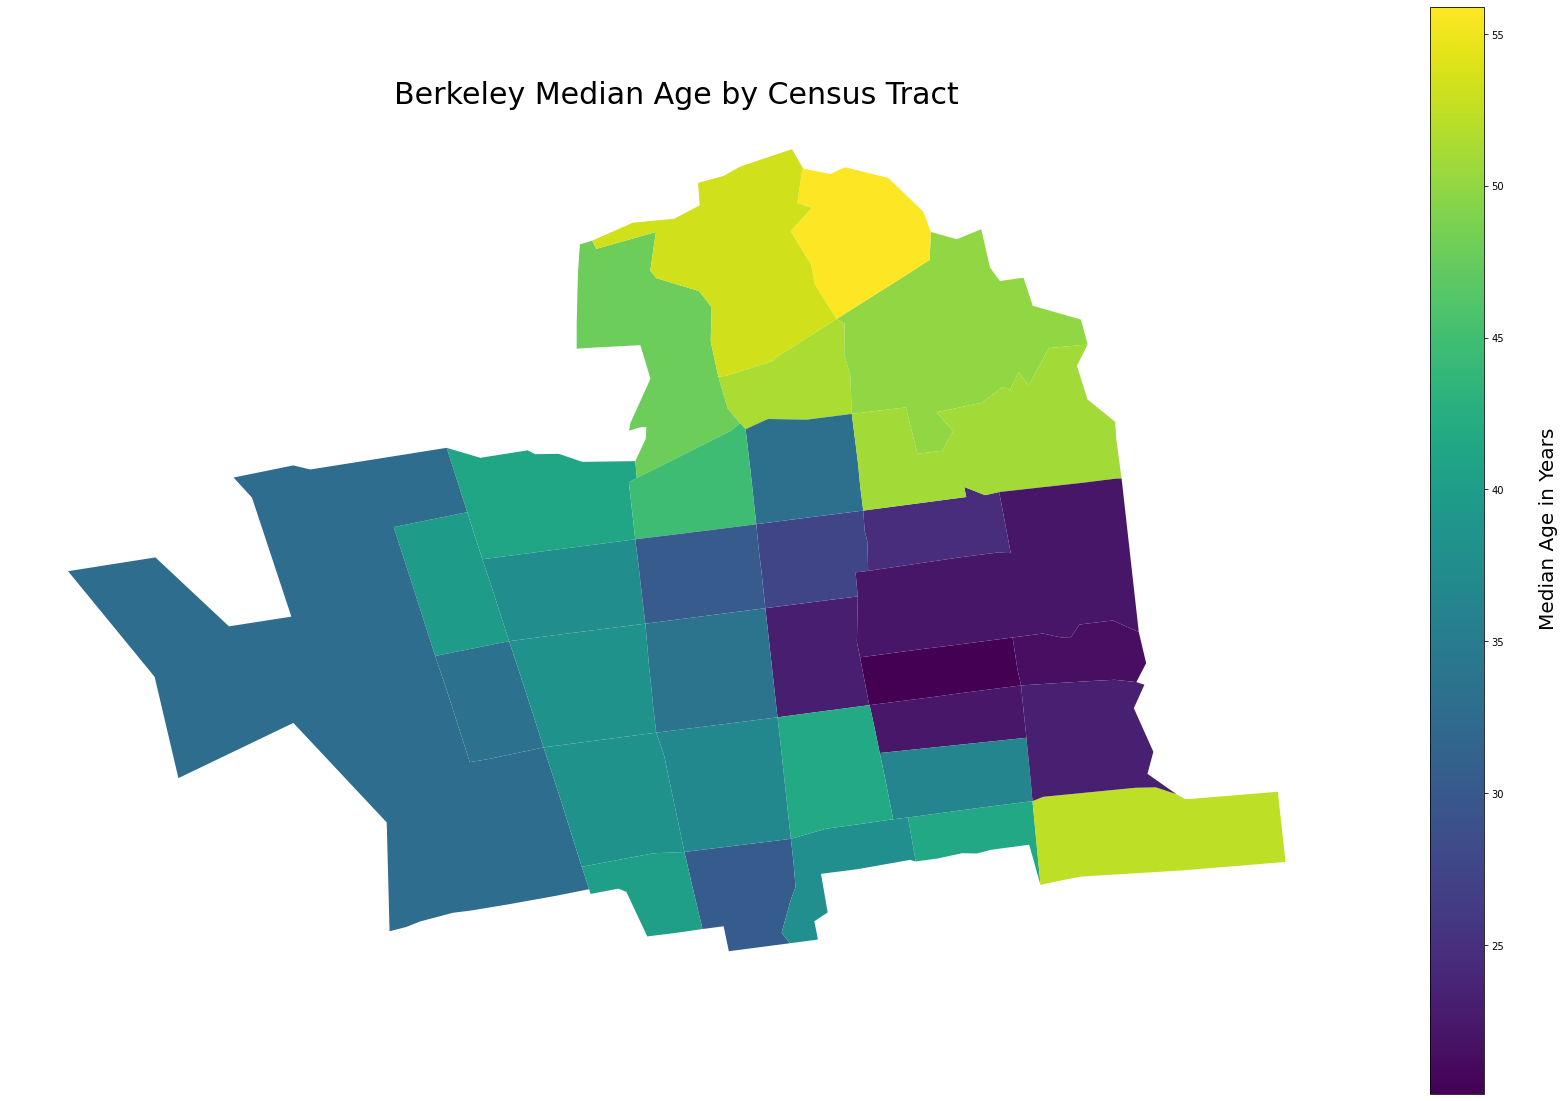

In [24]:
berkeley.plot(column = 'medianage', legend = True)
bounds = berkeley.bounds.iloc[0]
minx = bounds["minx"]
miny = bounds["miny"]
plt.text(minx + 0.0625, miny - 0.015, 'Median Age in Years', fontsize=20, rotation=90, rotation_mode='anchor')
plt.title('Berkeley Median Age by Census Tract', fontsize = 30)
plt.axis('off');

Can you tell which census tracts are around the UC Berkeley campus from this map? Explain.

YOUR ANSWER HERE

### Combining multiple `GeoDataFrames` <font color = 'red'> (53:40)

When working with multiple sets of geospatial data, we may need to plot multiple `GeoDataFrames` together on the same map. There are a few different ways we can do this.

If one of our `GeoDataFrames` covers a smaller area than the other, we can use the `GeoDataFrame` with the larger area as a base on top of which we plot the smaller `GeoDataFrame`. To do this, we use the optional `ax` argument when plotting the smaller `GeoDataFrame` to tell the plotting sofware that we want to continue using a previously plotted map.

In [29]:
berkeley.crs ={'init': 'epsg:4326'}

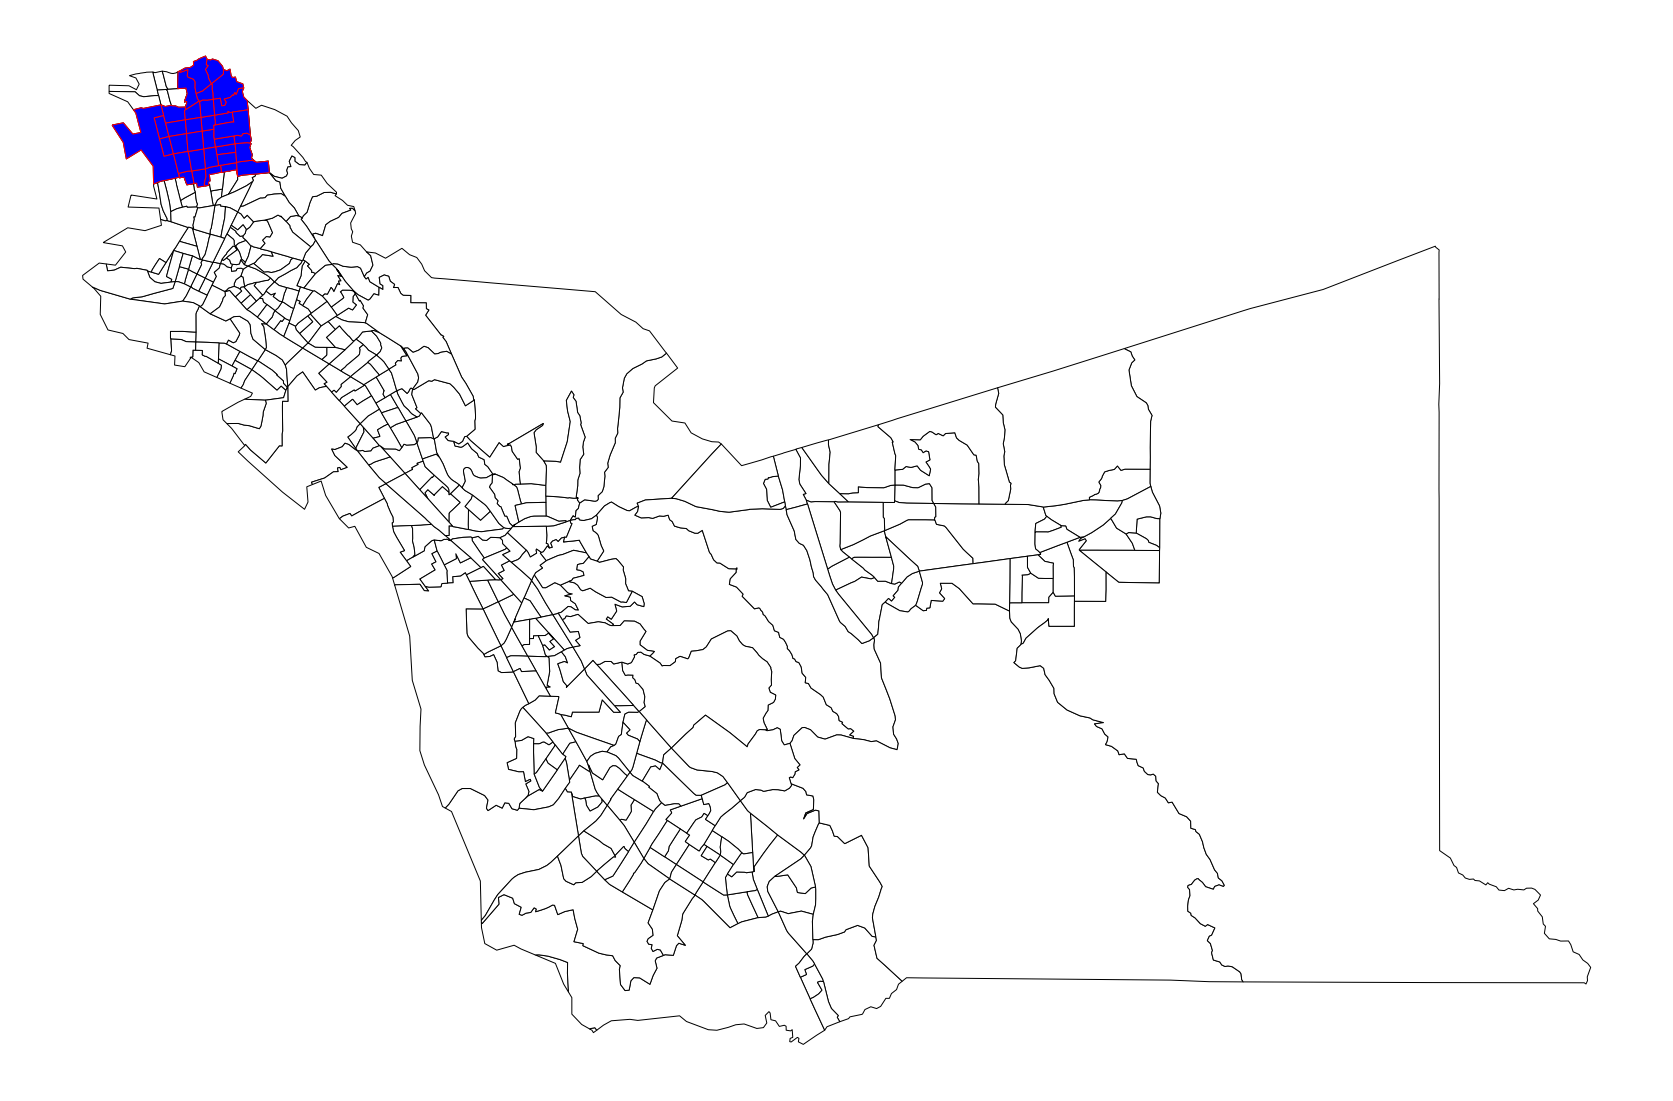

In [30]:
# We can also define explicitly the colors of the lines and open spaces on our map.
base = alameda.plot(color = 'white', edgecolor = 'black')
berkeley.plot(ax = base, color = 'blue', edgecolor = 'red')
plt.axis('off');

We may also have separate `GeoDataFrames` that do not overlap, and we may want to combine them into a single table. Let's load in some more data so we can see this in action.

First, we need to read in our data. Let's use the `read_file` method from before to load in shapefiles in the `contra_costa` and `san_francisco` folders inside the `shapefiles` folder.

In [31]:
contra_costa = gpd.read_file('shapefiles/contra_costa')
san_francisco = gpd.read_file('shapefiles/san_francisco')

Now that you have loaded the data in, let's take a look at the columns it contains.

In [32]:
contra_costa.columns

Index(['AFFGEOID', 'ALAND', 'ALAND_1', 'AWATER', 'AWATER_1', 'COUNTYFP',
       'COUNTYFP_1', 'FID_1', 'FUNCSTAT', 'GEOID', 'GEOID_1', 'Geography',
       'INTPTLAT', 'INTPTLON', 'Id', 'Id2', 'LSAD', 'MTFCC', 'NAME',
       'NAMELSAD', 'NAME_1', 'STATEFP', 'STATEFP_1', 'TRACTCE', 'TRACTCE_1',
       'female', 'male', 'medianage', 'mergeid', 'pct_20to64', 'pct_over64',
       'pct_pov', 'pct_und_20', 'total_pop', 'geometry'],
      dtype='object')

In [33]:
san_francisco.columns

Index(['AFFGEOID', 'ALAND', 'ALAND_1', 'AWATER', 'AWATER_1', 'COUNTYFP',
       'COUNTYFP_1', 'FID_1', 'FUNCSTAT', 'GEOID', 'GEOID_1', 'Geography',
       'INTPTLAT', 'INTPTLON', 'Id', 'Id2', 'LSAD', 'MTFCC', 'NAME',
       'NAMELSAD', 'NAME_1', 'STATEFP', 'STATEFP_1', 'TRACTCE', 'TRACTCE_1',
       'female', 'male', 'medianage', 'mergeid', 'pct_20to64', 'pct_over64',
       'pct_pov', 'pct_und_20', 'total_pop', 'geometry'],
      dtype='object')

Since `contra_costa` and `san_francisco` both have the same columns as `alameda`, we can use the `.append()` method to combine them without introducing any missing values, or spaces in our data table that do not have any information. Different packages can often have different ways of dealing with missing values, such completely ignoring any rows containing missing values to interpreting missing values as some default value. Since we do not have any missing values here, we don't have to worry about this.

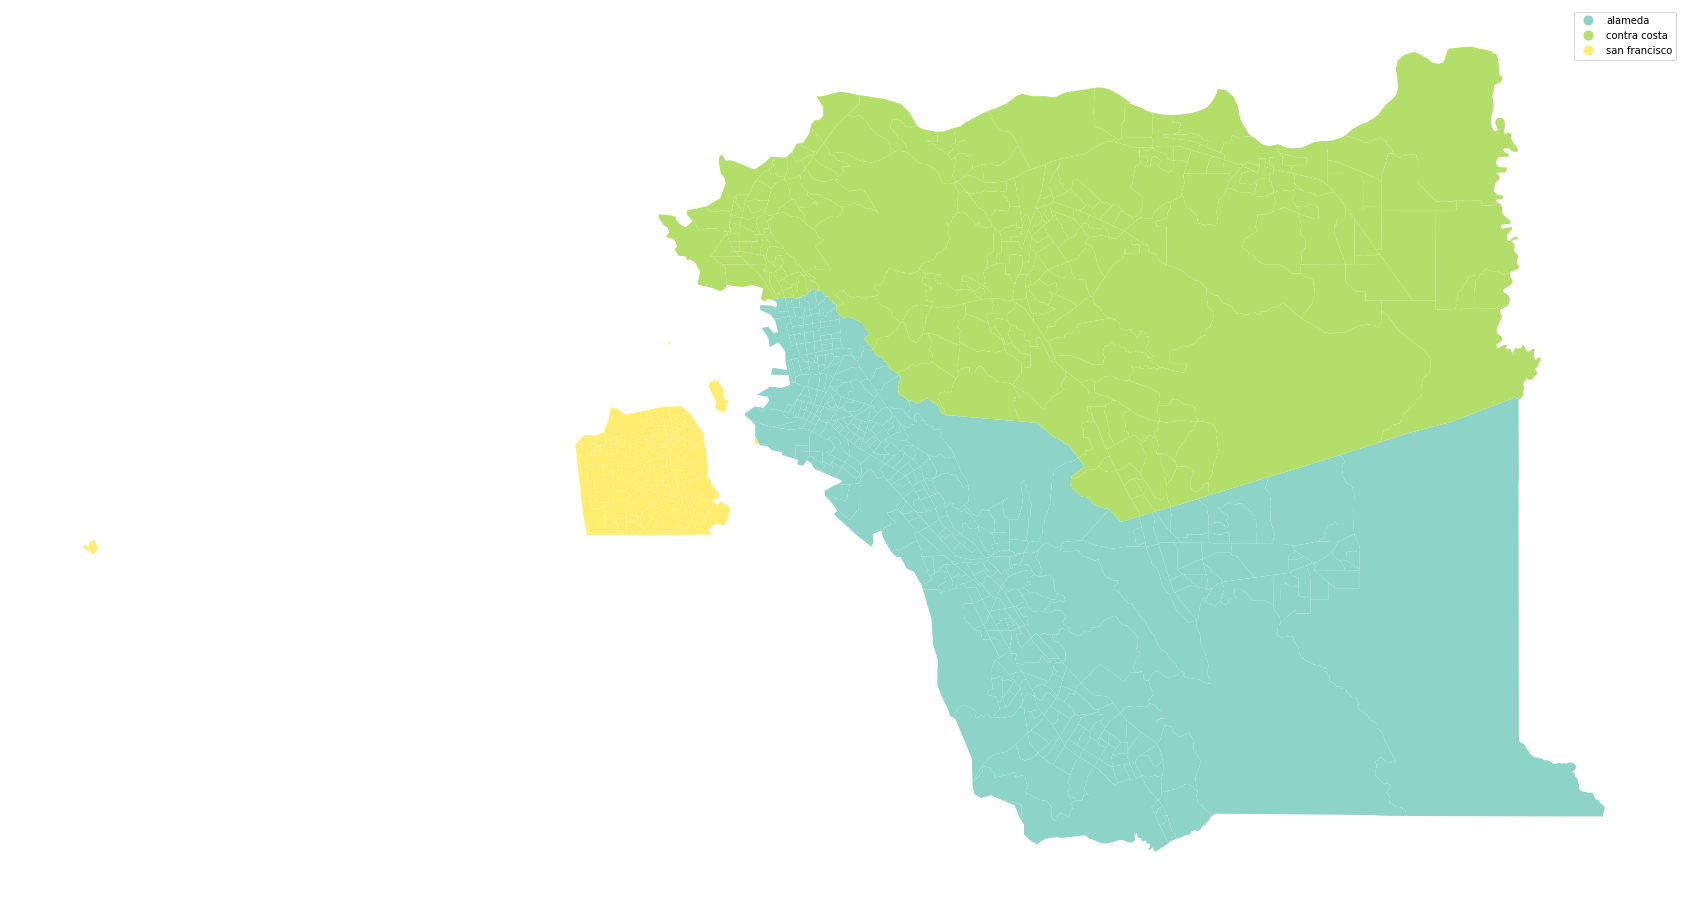

In [35]:
# These three lines create a new column called 'county' in each of the GeoDataFrames,
# then assigns the name of the county to all rows within the GeoDataFrame.
alameda['county'] = 'alameda'
contra_costa['county'] = 'contra costa'
san_francisco['county'] = 'san francisco'

# This creates a new, empty GeoDataFrame, then appends of our GeoDataFrames to it.
data = gpd.GeoDataFrame()
data = data.append(alameda)
data = data.append(contra_costa)
data = data.append(san_francisco)

# This plots our new aggregated GeoDataFrame using the 'county' column we created
# above.
data.crs ={'init': 'epsg:4326'}
data.plot(column = 'county', legend = True, cmap = 'Set3')
plt.axis('off');

Note that the code for this map has essentially the same form as the choropleth maps we created earlier. Since the column we are using to distinguish the census transects from each other is text rather than continuous numerical values, the plotting software uses distinct colors rather than a smooth spectrum.

# More geospatial data types in `geopandas` <font color = 'red'> (1:00:10)

So far, we have only been creating maps using polygons, but `geopandas` has a few more data types we can work with. First, we need some new data to work with. In the `shapefiles` folder, we have folders named `bart_stations` and `bart_routes` containing geospatial data about the BART system. Load in the data as we did with `alameda` file from the beginning of the lab.

In [36]:
bart_stations = gpd.read_file('shapefiles/bart_stations')
bart_routes = gpd.read_file('shapefiles/bart_routes')

## Examining the data

To get an idea of what the data we are working with looks like, let's call the `.head()` method on the data we have just read.

In [37]:
bart_stations.head()

,STATION,OPERATOR,DIST,CO,geometry
0,NORTH BERKELEY,BART,4,ALA,POINT (-122.28335 37.87406)
1,DOWNTOWN BERKELEY,BART,4,ALA,POINT (-122.26825 37.86969)
2,ASHBY,BART,4,ALA,POINT (-122.27012 37.85321)
3,ROCKRIDGE,BART,4,ALA,POINT (-122.25178 37.84451)
4,MACARTHUR,BART,4,ALA,POINT (-122.26712 37.82871)


In [38]:
bart_routes.head()

,ROUTE,Shape_Leng,LINE,geometry
0,Fremont to Richmond,63744.982926,Orange,"MULTILINESTRING ((-121.97557 37.55675, -121.97..."
1,Dublin/Pleasanton to Daly City,62533.376990,Blue,"MULTILINESTRING ((-122.02116 37.70133, -122.02..."
2,Millbrae to SFO Shuttle,3685.600280,None,"LINESTRING (-122.39049 37.61646, -122.39388 37..."
3,Fremont to Daly City,65085.390424,Green,"MULTILINESTRING ((-122.03611 37.60914, -122.03..."
4,Richmond to Daly City to Millbrae,64592.342559,Red,"MULTILINESTRING ((-122.46983 37.69175, -122.46..."


Looking at the `geometry` columns of our two GeoDataFrames, we can see that we have some new types of data. Where we had polygons before, our new data have points and linestrings. Points are are exactly what they sound like, 1-dimensional coordinates in space. Linestrings are line segments that do not necessarily have to be a straight line.

Use the following cell to draw a linestring the same way we did the first time we looked at a polygon.

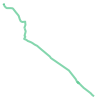

In [40]:
# YOUR CODE HERE
bart_routes.loc[0, 'geometry']

## Creating the map

In the next few cells, you will create a map that overlays the bart stations and routes over a map of all the counties. (Alameda, Contra Costa, and San Francisco)

First, we need the base map of all the counties. We can use the aggregated `GeoDataFrame` we created earlier in this notebook. Try setting the `color` and `edgecolor` arguments so the map looks more uniform.

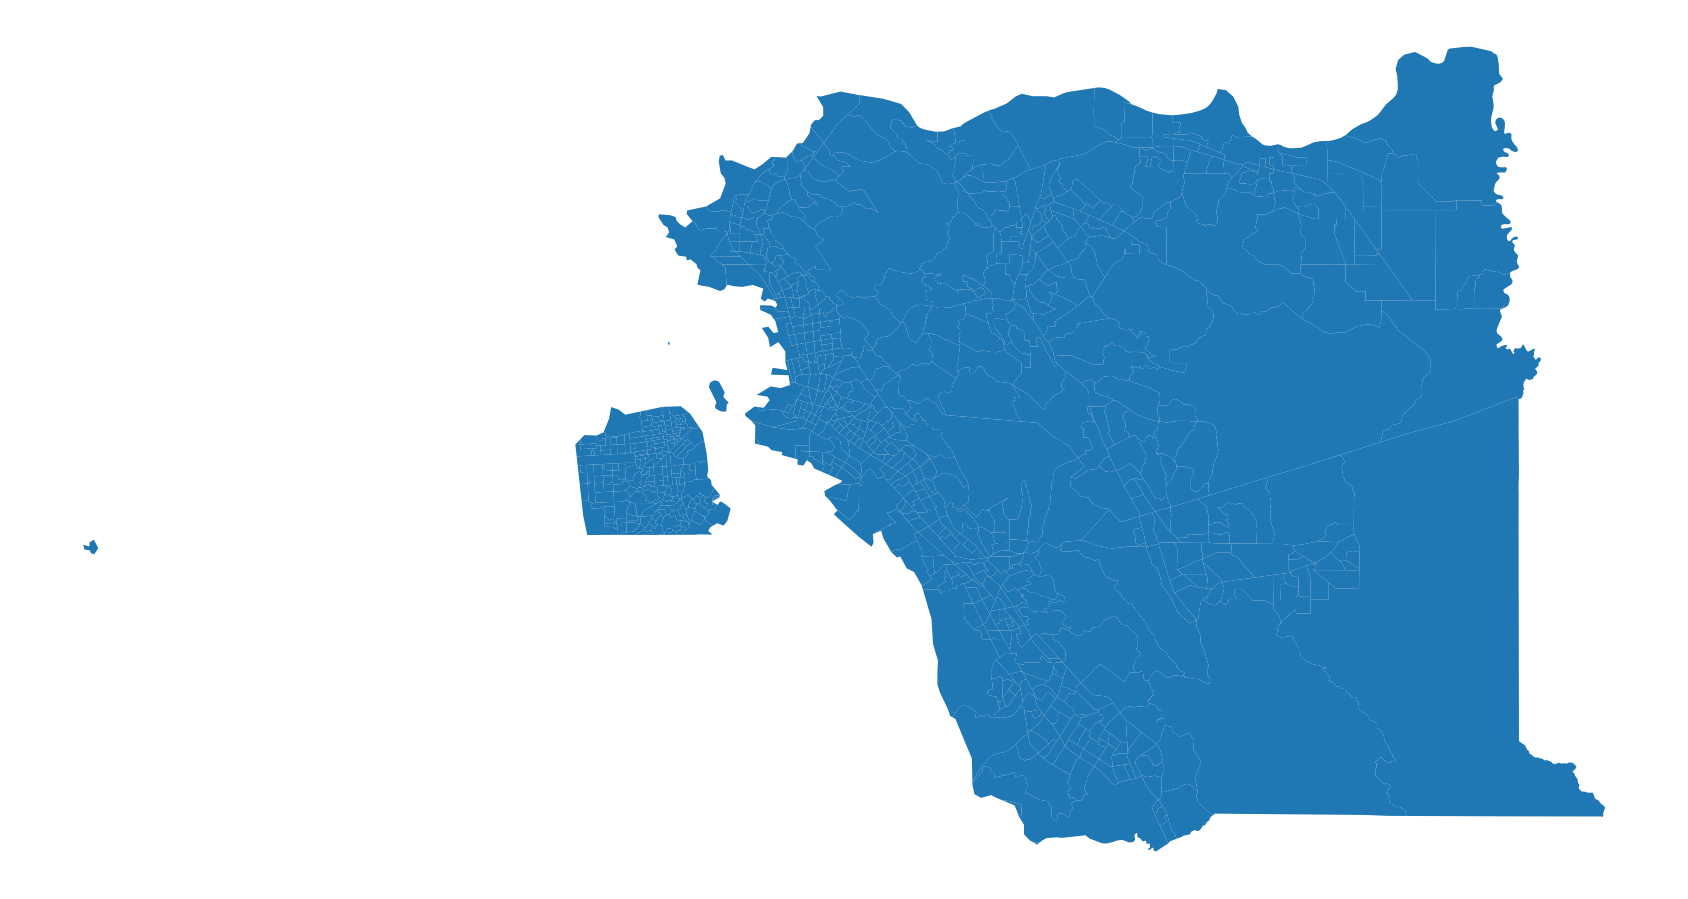

In [41]:
base = data.plot()
plt.axis('off');

Next, overlay the routes and stations and plot the graph by using this as the base for the map. The Jupyter notebook will not remember the map you drew in the previous cell even if you assigned it a name, so make sure to plot the base map again in the following cell.

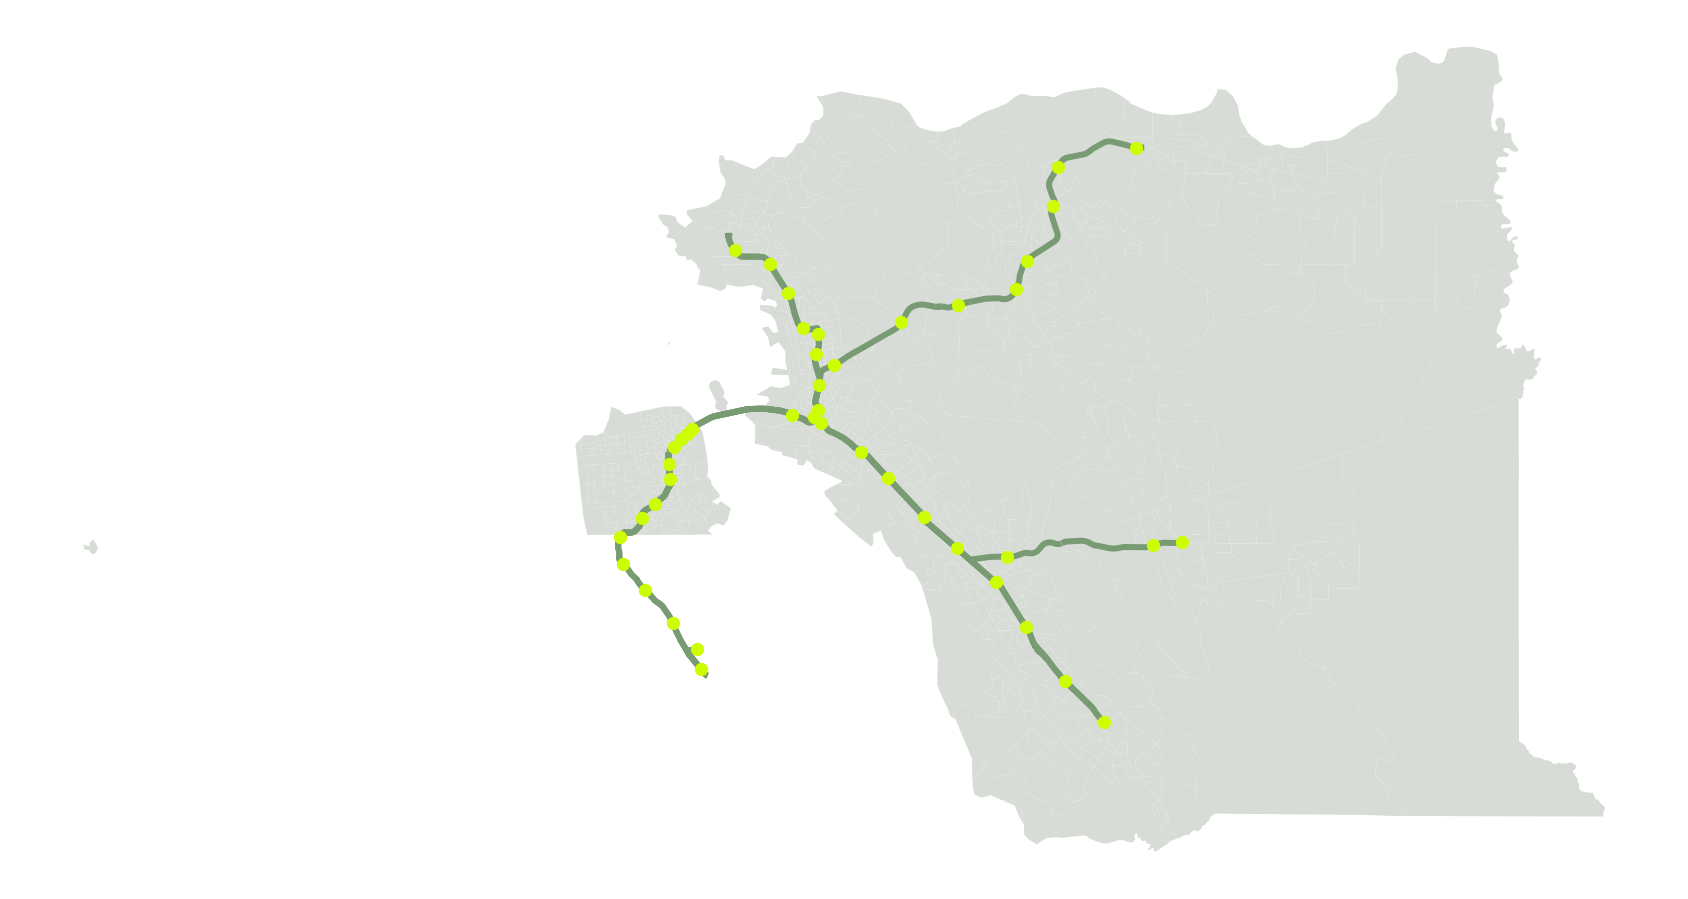

In [43]:
base = data.plot(color = '#d8dcd6', zorder=1)
bart_routes.plot(ax=base, color = '#789b73', linewidth = 6, zorder=2)
bart_stations.plot(ax=base, color = '#cdfd02', markersize = 150, zorder=3)
plt.axis('off');

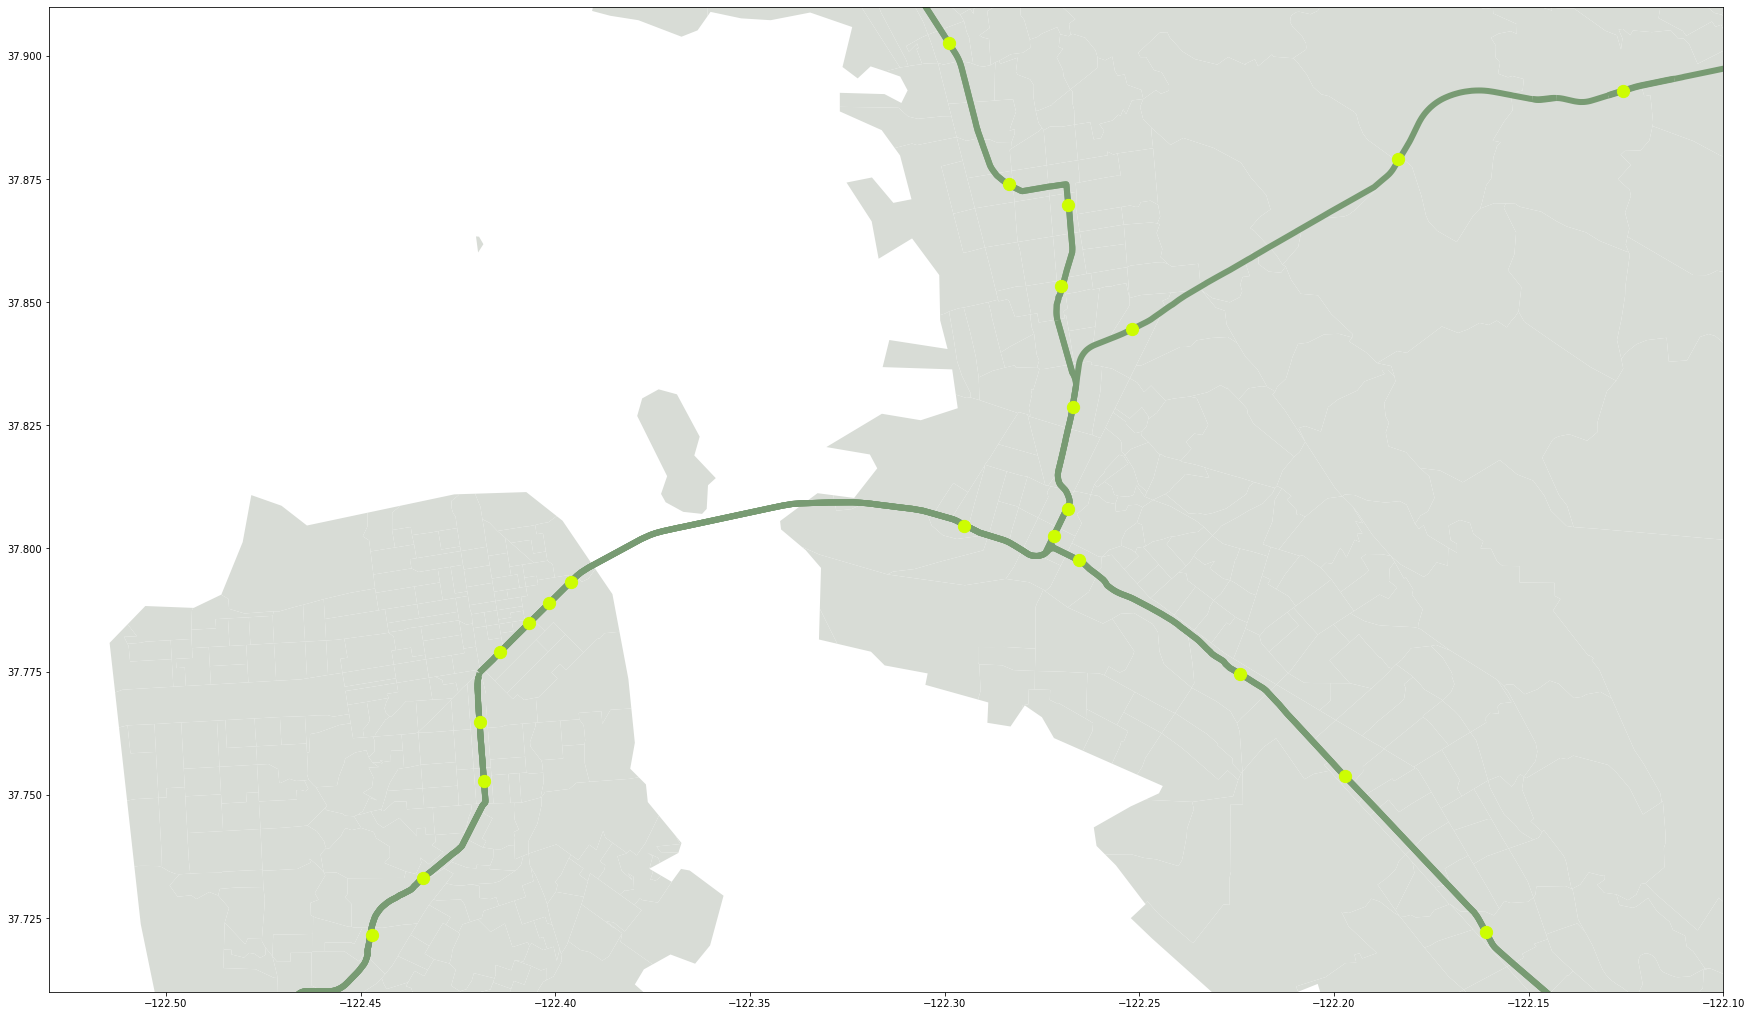

In [45]:
base = data.plot(color = '#d8dcd6', zorder=1)
bart_routes.plot(ax=base, color = '#789b73', linewidth = 6, zorder=2)
bart_stations.plot(ax=base, color = '#cdfd02', markersize = 150, zorder=3)
plt.xlim(-122.53, -122.10)
plt.ylim(37.71, 37.91)

plt.axis('on');

Congratulations! You're done with this lab! If you are interested in learning more about what you can do with `geopandas`, you can find the documentation for the package [here](http://geopandas.org/reference.html).

***

### Authors: Monica Wilkinson and Vera Wang
### References:
- http://geopandas.org/mapping.html
- https://matplotlib.org/users/colormaps.html
- http://www.bayareacensus.ca.gov/small/small.htm
- https://www.bart.gov/schedules/developers/geo